In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [3]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0


### Visualize/Explore Data - If You Want, You Do You

697.8284409654273 692.0
713.3269111249223 707.0


<AxesSubplot:xlabel='fico', ylabel='Density'>

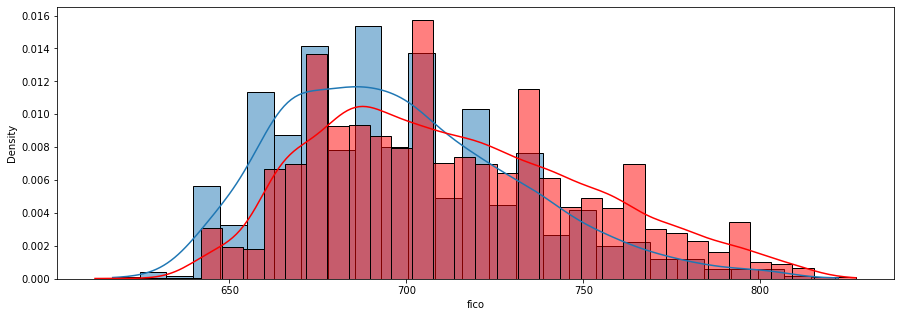

In [5]:

dfr = df[df["not.fully.paid"]==1]
dfN = df[df["not.fully.paid"]==0]
dffr = dfr.fico
dffn = dfN.fico
print(dffr.mean(), dffr.median())
print( dffn.mean(), dffn.median())
sns.histplot(dffr, kde=True, stat="density")
sns.histplot(dffn, kde=True, stat="density", color='red')



## Solutions

In [6]:
dffr.mean(), dffn.mean(), dffr.count(), dffn.count()


(697.8284409654273, 713.3269111249223, 1533, 8045)

In [7]:
stat, pval = ss.ttest_ind(dffr, dffn)
pval

4.227100096647354e-49

In [23]:
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(dffr, dffn)
alpha = .05
nobs = dffr.count() + dffn.count()

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces


(1.0, -0.4128025157921774)

717.3560311284047 712.0
683.978051391863 682.0


<AxesSubplot:xlabel='fico', ylabel='Density'>

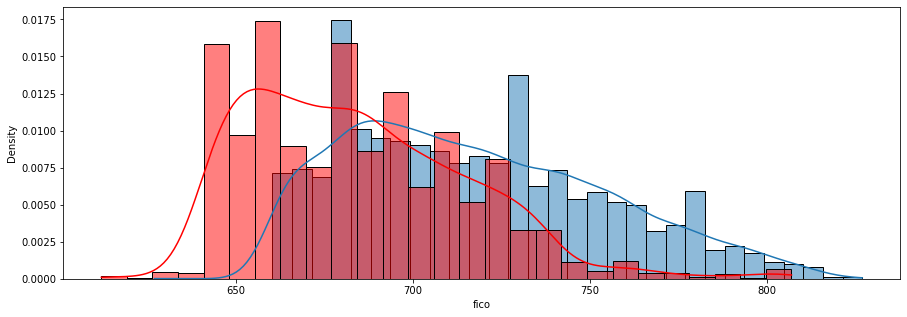

In [13]:
dfw = df[df["credit.policy"]==1]
dfnw = df[df["credit.policy"]==0]
dffw = dfw.fico
dffnw = dfnw.fico
print(dffw.mean(), dffw.median())
print( dffnw.mean(), dffnw.median())
sns.histplot(dffw, kde=True, stat="density")
sns.histplot(dffnw, kde=True, stat="density", color='red')


In [19]:
dffw.mean(), dffnw.mean(), dffw.count(), dffnw.count()

(717.3560311284047, 683.978051391863, 7710, 1868)

In [34]:
stat, pval = ss.ttest_ind(dffw, dffnw)
stat,pval

(36.36259987408664, 2.6100416830751396e-271)

In [24]:
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(dffw,dffnw)
alpha = .05
nobs = dffw.count() + dffnw.count()

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces


(1.0, 0.9377366905031831)

10.942680001295294 10.93310697
10.888519880012797 10.89673933


<AxesSubplot:xlabel='log.annual.inc', ylabel='Density'>

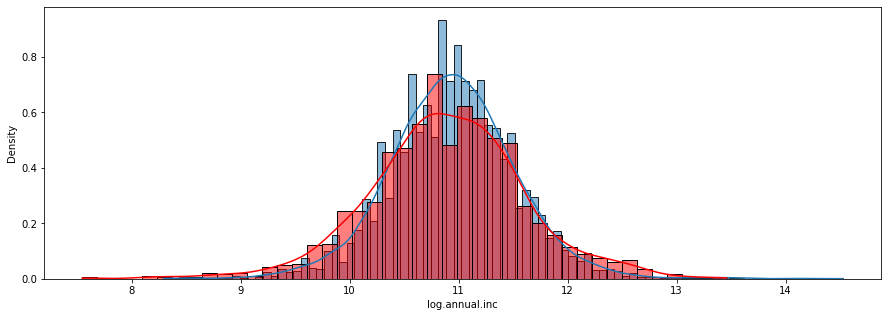

In [18]:
dfw = df[df["credit.policy"]==1]
dfnw = df[df["credit.policy"]==0]
dffi = dfw["log.annual.inc"]
dffni = dfnw["log.annual.inc"]
print(dffi.mean(), dffi.median())
print( dffni.mean(), dffni.median())
sns.histplot(dffi, kde=True, stat="density")
sns.histplot(dffni, kde=True, stat="density", color='red')


In [25]:
dffi.mean(), dffni.mean(), dffi.count(), dffni.count()

(10.942680001295294, 10.888519880012797, 7710, 1868)

In [26]:
stat, pval = ss.ttest_ind(dffi, dffni)
pval

0.0006337324172012597

In [33]:
print(ss.ttest_ind(dffi,dffni))

Ttest_indResult(statistic=3.4178817682392073, pvalue=0.0006337324172012597)


In [30]:
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(dffi,dffni)
alpha = .05
nobs = dffi.count() + dffni.count()

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces


(1.0, 0.08813984185782714)

In [31]:
n = powerTest.solve_power(ces, power=.85, nobs=None, alpha=alpha)
n

1157.6455504969408

In [35]:
df["real_income"]=np.exp(df["log.annual.inc"])
df["real_income"].head()

0    85000.000385
1    65000.000073
2    31999.999943
3    85000.000385
4    80799.999636
Name: real_income, dtype: float64

In [38]:
df["real_income"].mean()

68402.03071015503

In [37]:
from scipy.stats import skew 
print(skew(df["real_income"]))
print(skew(df["fico"]))
print(skew(df["days.with.cr.line"]))

9.592046489493258
0.47118593325420144
1.1555672187692227


In [44]:
df.groupby(["real_income"],sort=False)["fico"].size()

real_income
85000.000385     107
65000.000073     146
31999.999943      64
80799.999636       1
147999.999594      4
                ... 
51900.000044       1
138999.999706      1
217999.999614      1
59819.999869       1
24599.279921       1
Name: fico, Length: 1987, dtype: int64

<AxesSubplot:xlabel='dti', ylabel='Density'>

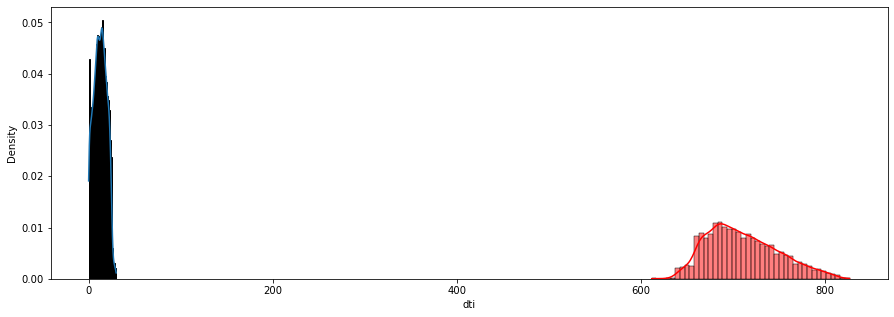

In [46]:
sns.histplot(df["dti"], kde=True, stat="density")
sns.histplot(df["fico"], kde=True, stat="density", color='red')
